In [54]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from deepchem.molnet import load_hiv, load_tox21, load_bace_classification, load_sider, load_clintox, load_bbbp
from hdpy.metrics import compute_roc_enrichment
import seaborn as sns
sns.set_style("whitegrid")


# plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=17)
plt.rc('figure', titlesize=20)

from tqdm import tqdm
from pathlib import Path

# RANDOM_SEED=5
# RANDOM_SEED=99
RANDOM_SEED=101
output_result_dir = Path(f"/p/vast1/jones289/hd_results/{RANDOM_SEED}")

green_color_pal = sns.color_palette("Greens", 10)
blue_color_pal = sns.color_palette("Blues", 10)
red_color_pal = sns.color_palette("Reds", 10)
purple_color_pal = sns.color_palette("Purples", 10)
rocket_color_pal = sns.color_palette("rocket", 10)

plot_dict = {
    "RPFP": ("HDB-RPFP", red_color_pal[4]),
    "Combo": ("HDB-Combo", purple_color_pal[5]),
            #   "HDBind (10k) (GPU-no encode)": green_color_pal[8],
              "MoLFormer": ("HDB-MoLFormer", green_color_pal[7]),
              # "MoLFormer+RPFP": ("HDB Combo", green_color_pal[9]),
              "MolCLR": ("HDB-MolCLR", green_color_pal[4]),
              "DECFP-4": ("HDB-DECFP", red_color_pal[8]),
              "DECFP-4-Tani": ("HDB-DECFP", blue_color_pal[4]),
              "MLP": ("MLP", "black"),
    }


d_to_idx_map = {"1k": 1000,
                "10k": 10000,
                "100k": 100000,
                "1m": 1000000,
                "20k": 20000,
                "50k": 50000,
                "200k": 200000,
                "500k": 500000,
                "16384": 16384}

# define the values of D instead so I don't have to enumerate this extensively...
# d_list = [1000, 10000, 100000, 1000000, 16384, 20000, 50000, 200000, 500000]
# model_name_map = {
'''

'''
model_name_map ={  
    "mlp-1024-1": ("MLP-1024", 1024),
    # "mlp-2048-1": ("MLP-2048", 2048),
    # "hdbind-rp-molformer-1k": ("HDB-MoLFormer", 1000),
    # "hdbind-rp-molformer": ("HDB-MoLFormer", 10000),
    # "hdbind-rp-molformer-100k": ("HDB-MoLFormer", 100000),
    # "hdbind-rp-molformer-1m": ("HDB-MoLFormer", 1000000),
    # "hdbind-rp-molformer-20k": ("HDB-MoLFormer", 20000),
    # "hdbind-rp-molformer-50k": ("HDB-MoLFormer", 50000),
    # "hdbind-rp-molformer-200k": ("HDB-MoLFormer", 200000),
    # "hdbind-rp-molformer-500k": ("HDB-MoLFormer", 500000),
    "hdbind-directecfp-tanimoto-16384-1": ("HDB-DECFP-Tani", 16384),
    "hdbind-directecfp-16384-1": ("HDB-DECFP", 16384),
    # "hdbind-directecfp-16384-2": ("HDB-DECFP", 16384),
    # "hdbind-directecfp-16384-4": ("HDB-DECFP", 16384),
    # "hdbind-molformer-decfp-combo-1k": ("HDB-Combo", 1000),
    # "hdbind-molformer-decfp-combo-100k": ("HDB-Combo", 100000),
    # "hdbind-molformer-decfp-combo-1m": ("HDB-Combo", 1000000),
    # "hdbind-molformer-decfp-combo": ("HDB-Combo", 10000),
    # "hdbind-molformer-decfp-combo-20k": ("HDB-Combo", 20000),
    # "hdbind-molformer-decfp-combo-50k": ("HDB-Combo", 50000),
    # "hdbind-molformer-decfp-combo-200k": ("HDB-Combo", 200000),
    # "hdbind-molformer-decfp-combo-500k": ("HDB-Combo", 500000),
    # "hdbind-rp-ecfp-1024-1-1k": ("HDB-RPFP", 1000),
    # "hdbind-rp-ecfp-1024-1": ("HDB-RPFP", 10000),
    # "hdbind-rp-ecfp-1024-1-100k": ("HDB-RPFP", 100000),
    # "hdbind-rp-ecfp-1024-1-1m": ("HDB-RPFP", 1000000),
    # "hdbind-rp-ecfp-1024-1-20k": ("HDB-RPFP", 20000),
    # "hdbind-rp-ecfp-1024-1-50k": ("HDB-RPFP", 50000),
    # "hdbind-rp-ecfp-1024-1-200k": ("HDB-RPFP", 200000),
    # "hdbind-rp-ecfp-1024-1-500k": ("HDB-RPFP", 500000),
    # "hdbind-rp-molclr-1k": ("HDB-MolCLR", 1000),
    # "hdbind-rp-molclr": ("HDB-MolCLR", 10000),
    # "hdbind-rp-molclr-100k": ("HDB-MolCLR", 100000),
    # "hdbind-rp-molclr-1m": ("HDB-MolCLR", 1000000),
    # "hdbind-rp-molclr-20k": ("HDB-MolCLR", 20000),
    # "hdbind-rp-molclr-50k": ("HDB-MolCLR", 50000),
    # "hdbind-rp-molclr-200k": ("HDB-MolCLR", 200000),
    # "hdbind-rp-molclr-500k": ("HDB-MolCLR", 500000),
    # "hdbind-directecfp-1k-1": ("HDB-DECFP", 1000),
    # "hdbind-directecfp-1k-2": ("HDB-DECFP", 1000),
    # "hdbind-directecfp-1k-4": ("HDB-DECFP", 1000),
    # "hdbind-directecfp-10k-1": ("HDB-DECFP", 10000),
    # "hdbind-directecfp-10k-2": ("HDB-DECFP", 10000),
    # "hdbind-directecfp-10k-4": ("HDB-DECFP", 10000),
    # "hdbind-directecfp-100k-1": ("HDB-DECFP", 100000),
    # "hdbind-directecfp-100k-2": ("HDB-DECFP", 100000),
    # "hdbind-directecfp-100k-4": ("HDB-DECFP", 100000),
    # "hdbind-directecfp-1m-1": ("HDB-DECFP", 1000000),
    # "hdbind-directecfp-1m-2": ("HDB-DECFP", 1000000),
    # "hdbind-directecfp-1m-4": ("HDB-DECFP", 1000000),
    # "hdbind-directecfp-20k-1": ("HDB-DECFP", 20000),
    # "hdbind-directecfp-20k-2": ("HDB-DECFP", 20000),
    # "hdbind-directecfp-20k-4": ("HDB-DECFP", 20000),
    # "hdbind-directecfp-50k-1": ("HDB-DECFP", 50000),
    # "hdbind-directecfp-50k-2": ("HDB-DECFP", 50000),
    # "hdbind-directecfp-50k-4": ("HDB-DECFP", 50000),
    # "hdbind-directecfp-200k-1": ("HDB-DECFP", 200000),
    # "hdbind-directecfp-200k-2": ("HDB-DECFP", 200000),
    # "hdbind-directecfp-200k-4": ("HDB-DECFP", 200000),
    # "hdbind-directecfp-500k-1": ("HDB-DECFP", 500000),
    # "hdbind-directecfp-500k-2": ("HDB-DECFP", 500000),
    # "hdbind-directecfp-500k-4": ("HDB-DECFP", 500000),
}
'''


'''
# }





'\n\n\n'

In [55]:
def collect_metrics(dataset:str, split:str, config_list:list, verbose=False):

    result_dict = {"model": [],
                   "D": [],
                   "target": [],
                   "seed": [],
                   "roc-auc": [],
                   "er-1": [],
                #    "train_time": [],
                #    "test_time": [],
                   "path": [],
                   }

    target_list = []
    if dataset in ["bbbp", "tox21", "clintox", "hiv", "bace", "sider"]:
        if dataset == "bbbp":
            data = load_bbbp()
        if dataset == "tox21":
            data = load_tox21()
        if dataset == "clintox":
            data = load_clintox(splitter="scaffold")
        if dataset == "hiv":
            data = load_hiv()
        if dataset == "bace":
            data = load_bace_classification()
        if dataset == "sider":
            data = load_sider()

        target_list = data[0]
    elif dataset == "lit-pcba":
        lit_pcba_ave_p = Path("/p/vast1/jones289/lit_pcba/AVE_unbiased")
        target_list = [x.name for x in list(lit_pcba_ave_p.glob("*/"))]

    # print(target_list)
    for config_path in tqdm(config_list):
        exp_name = config_path.stem
        if verbose:
            tqdm.write(f"{config_path}, {exp_name}")

        # '''
         # '''
        # for d in range(10):       
        if exp_name.split(".")[0] in model_name_map:

            for target_name in target_list:
                
                result_file = Path(
                    f"{output_result_dir}/{exp_name}.{dataset}-{target_name.replace(' ','_')}-{split}.{RANDOM_SEED}.pkl"
                )
                try:
                    if verbose:
                        tqdm.write(f"loading {result_file}")
                    data = torch.load(result_file)
                except FileNotFoundError as e:
                    tqdm.write(f"{e}. {result_file} does not exist.")
                    continue


                # print(data.keys())
                for random_state in data["trials"].keys():

                    result_dict["path"].append(result_file)
                    result_dict["model"].append(model_name_map[exp_name][0])
                    # result_dict["D"].append(data["args"].D)
                    result_dict["D"].append(model_name_map[exp_name][1])
                    result_dict["target"].append(target_name)
                    result_dict["seed"].append(random_state)
                    result_dict["roc-auc"].append(data["trials"][random_state]["roc-auc"])


                    am_time = data["trials"][random_state]["am_time_cpu_norm"] + data["trials"][random_state]["am_time_cuda_norm"]
                    retrain_time = data["trials"][random_state]["retrain_time_cpu_norm"] + data["trials"][random_state]["retrain_time_cuda_norm"]
                    test_time = data["trials"][random_state]["test_time_cpu_norm"] + data["trials"][random_state]["test_time_cuda_norm"]
                    # test_time = data["trials"][random_state]["test_time"]





                    '''
                    if isinstance(train_time, float):
                        if verbose:
                            tqdm.write(f"check {result_file} seed: {random_state} train_time is a float instead of a numpy array")
                        result_dict["train_time"].append(train_time)
                    else:

                        result_dict["train_time"].append(train_time.sum())

                    if isinstance(test_time, float):
                        if verbose:
                            tqdm.write(f"check {result_file} seed: {random_state} test_time is a float instead of a numpy array")
                        result_dict["test_time"].append(test_time/data["trials"][random_state]["y_true"].shape[0])
                    else:

                        result_dict["test_time"].append(test_time.sum()/data["trials"][random_state]["y_true"].shape[0])
                    '''





                    # compute er-1 metric or load saved value
                    try:
                        
                        er_1 = data["trials"][random_state]["er-1"]
                        result_dict["er-1"].append(er_1)

                    except KeyError as e:
                        
                        if verbose: 
                            tqdm.write(f"{e}. result missing roc-enrichment metrics. computing these now.")
                        for trial_idx in data["trials"].keys():
                            scores = None 
                            
                            if "er-1" not in data["trials"][trial_idx].keys():

                                # if config.model in ["molehd-bpe", "selfies","hdbind-directecfp-10k-4",
                                                    # "hdbind-molformer-decfp-combo",
                                                    #   "ecfp", "rp", "directecfp"]:
                                    # scores = model_data_dict["trials"][trial_idx]["eta"]
                                if "mlp" in exp_name.lower():
                                    scores = data["trials"][trial_idx]["eta"][:, 1]
                                else:

                                    scores = data["trials"][trial_idx]["eta"]
                                
                                labels = data["trials"][trial_idx]['y_true']

                                #TODO: allow for a list of fp_thresh to be computed
                                trial_er_1 = compute_roc_enrichment(scores=scores, labels=labels, fpr_thresh=.01)

                                data["trials"][trial_idx]["er-1"] = trial_er_1
                

    
                        er_1 = data["trials"][random_state]["er-1"]
                        result_dict["er-1"].append(er_1)
    # import pdb
    # pdb.set_trace()
    return pd.DataFrame(result_dict)

In [56]:
def get_metric_df(config_list: list, split:str, use_cache=True, verbose=False):
    assert split in ["ave", "random"]

    metric_df = None
    metric_df_path = Path(f"{split}-metric-df_backup.csv")
    if use_cache:
        metric_df = pd.read_csv(metric_df_path, index_col=0)
    else:
        metric_df = collect_metrics(dataset="lit-pcba", split=split, 
                                        config_list=config_list,
                                        verbose=verbose)
        metric_df.to_csv(metric_df_path)

    return metric_df


In [57]:
# config_dir = "roc_auc_configs_final"
config_dir = "roc_auc_configs_revise"
ave_metric_df = get_metric_df(config_list=list(Path(f"/usr/WS1/jones289/hd-cuda-master/hdpy/{config_dir}").glob("*.yml")),
                                split="ave", 
                                use_cache=False,
                                verbose=True)
ave_metric_df

  0%|          | 0/71 [00:00<?, ?it/s]

  1%|▏         | 1/71 [00:00<00:08,  8.52it/s]

/usr/WS1/jones289/hd-cuda-master/hdpy/roc_auc_configs_revise/mlp-1024-1.yml, mlp-1024-1
loading /p/vast1/jones289/hd_results/101/mlp-1024-1.lit-pcba-ADRB2-ave.101.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/101/mlp-1024-1.lit-pcba-ADRB2-ave.101.pkl'. /p/vast1/jones289/hd_results/101/mlp-1024-1.lit-pcba-ADRB2-ave.101.pkl does not exist.
loading /p/vast1/jones289/hd_results/101/mlp-1024-1.lit-pcba-ALDH1-ave.101.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/101/mlp-1024-1.lit-pcba-ALDH1-ave.101.pkl'. /p/vast1/jones289/hd_results/101/mlp-1024-1.lit-pcba-ALDH1-ave.101.pkl does not exist.
loading /p/vast1/jones289/hd_results/101/mlp-1024-1.lit-pcba-ESR1_ago-ave.101.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/101/mlp-1024-1.lit-pcba-ESR1_ago-ave.101.pkl'. /p/vast1/jones289/hd_results/101/mlp-1024-1.lit-pcba-ESR1_ago-ave.101.pkl does not exist.
loading /p/vast1/jones289/hd_results/101/mlp-1024-1.lit-pcba-ESR1_ant-av

  1%|▏         | 1/71 [00:00<00:08,  8.52it/s]

/usr/WS1/jones289/hd-cuda-master/hdpy/roc_auc_configs_revise/hdbind-directecfp-1m-4.yml, hdbind-directecfp-1m-4
/usr/WS1/jones289/hd-cuda-master/hdpy/roc_auc_configs_revise/hdbind-directecfp-tanimoto-16384-1.yml, hdbind-directecfp-tanimoto-16384-1
loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-tanimoto-16384-1.lit-pcba-ADRB2-ave.101.pkl


  1%|▏         | 1/71 [00:00<00:08,  8.52it/s]

loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-tanimoto-16384-1.lit-pcba-ALDH1-ave.101.pkl
loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-tanimoto-16384-1.lit-pcba-ESR1_ago-ave.101.pkl
loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-tanimoto-16384-1.lit-pcba-ESR1_ant-ave.101.pkl
loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-tanimoto-16384-1.lit-pcba-FEN1-ave.101.pkl


  1%|▏         | 1/71 [00:01<00:08,  8.52it/s]

loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-tanimoto-16384-1.lit-pcba-GBA-ave.101.pkl


  1%|▏         | 1/71 [00:01<00:08,  8.52it/s]

loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-tanimoto-16384-1.lit-pcba-IDH1-ave.101.pkl


  1%|▏         | 1/71 [00:02<00:08,  8.52it/s]

loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-tanimoto-16384-1.lit-pcba-KAT2A-ave.101.pkl


  1%|▏         | 1/71 [00:02<00:08,  8.52it/s]

loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-tanimoto-16384-1.lit-pcba-MAPK1-ave.101.pkl
loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-tanimoto-16384-1.lit-pcba-MTORC1-ave.101.pkl


  1%|▏         | 1/71 [00:02<00:08,  8.52it/s]

loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-tanimoto-16384-1.lit-pcba-OPRK1-ave.101.pkl


  1%|▏         | 1/71 [00:03<00:08,  8.52it/s]

loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-tanimoto-16384-1.lit-pcba-PKM2-ave.101.pkl


  1%|▏         | 1/71 [00:03<00:08,  8.52it/s]

loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-tanimoto-16384-1.lit-pcba-PPARG-ave.101.pkl
loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-tanimoto-16384-1.lit-pcba-TP53-ave.101.pkl
loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-tanimoto-16384-1.lit-pcba-VDR-ave.101.pkl


 76%|███████▌  | 54/71 [00:03<00:01, 14.41it/s]

/usr/WS1/jones289/hd-cuda-master/hdpy/roc_auc_configs_revise/hdbind-directecfp-1k-1.yml, hdbind-directecfp-1k-1
/usr/WS1/jones289/hd-cuda-master/hdpy/roc_auc_configs_revise/hdbind-directecfp-1k-2.yml, hdbind-directecfp-1k-2
/usr/WS1/jones289/hd-cuda-master/hdpy/roc_auc_configs_revise/hdbind-directecfp-1k-4.yml, hdbind-directecfp-1k-4
/usr/WS1/jones289/hd-cuda-master/hdpy/roc_auc_configs_revise/hdbind-directecfp-16384-1.yml, hdbind-directecfp-16384-1
loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-16384-1.lit-pcba-ADRB2-ave.101.pkl


 76%|███████▌  | 54/71 [00:04<00:01, 14.41it/s]

loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-16384-1.lit-pcba-ALDH1-ave.101.pkl
loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-16384-1.lit-pcba-ESR1_ago-ave.101.pkl
loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-16384-1.lit-pcba-ESR1_ant-ave.101.pkl
loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-16384-1.lit-pcba-FEN1-ave.101.pkl


 76%|███████▌  | 54/71 [00:04<00:01, 14.41it/s]

loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-16384-1.lit-pcba-GBA-ave.101.pkl


 76%|███████▌  | 54/71 [00:04<00:01, 14.41it/s]

loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-16384-1.lit-pcba-IDH1-ave.101.pkl


 76%|███████▌  | 54/71 [00:05<00:01, 14.41it/s]

loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-16384-1.lit-pcba-KAT2A-ave.101.pkl


 76%|███████▌  | 54/71 [00:05<00:01, 14.41it/s]

loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-16384-1.lit-pcba-MAPK1-ave.101.pkl
loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-16384-1.lit-pcba-MTORC1-ave.101.pkl


 76%|███████▌  | 54/71 [00:06<00:01, 14.41it/s]

loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-16384-1.lit-pcba-OPRK1-ave.101.pkl


 76%|███████▌  | 54/71 [00:06<00:01, 14.41it/s]

loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-16384-1.lit-pcba-PKM2-ave.101.pkl


 76%|███████▌  | 54/71 [00:06<00:01, 14.41it/s]

loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-16384-1.lit-pcba-PPARG-ave.101.pkl
loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-16384-1.lit-pcba-TP53-ave.101.pkl
loading /p/vast1/jones289/hd_results/101/hdbind-directecfp-16384-1.lit-pcba-VDR-ave.101.pkl


100%|██████████| 71/71 [00:06<00:00, 10.15it/s]

/usr/WS1/jones289/hd-cuda-master/hdpy/roc_auc_configs_revise/hdbind-directecfp-16384-2.yml, hdbind-directecfp-16384-2
/usr/WS1/jones289/hd-cuda-master/hdpy/roc_auc_configs_revise/hdbind-directecfp-16384-4.yml, hdbind-directecfp-16384-4
/usr/WS1/jones289/hd-cuda-master/hdpy/roc_auc_configs_revise/hdbind-directecfp-10k-1.yml, hdbind-directecfp-10k-1
/usr/WS1/jones289/hd-cuda-master/hdpy/roc_auc_configs_revise/hdbind-directecfp-10k-2.yml, hdbind-directecfp-10k-2
/usr/WS1/jones289/hd-cuda-master/hdpy/roc_auc_configs_revise/hdbind-directecfp-10k-4.yml, hdbind-directecfp-10k-4
/usr/WS1/jones289/hd-cuda-master/hdpy/roc_auc_configs_revise/hdbind-rp-molclr.yml, hdbind-rp-molclr
/usr/WS1/jones289/hd-cuda-master/hdpy/roc_auc_configs_revise/hdbind-rp-molclr-1m.yml, hdbind-rp-molclr-1m
/usr/WS1/jones289/hd-cuda-master/hdpy/roc_auc_configs_revise/hdbind-rp-molclr-1k.yml, hdbind-rp-molclr-1k
/usr/WS1/jones289/hd-cuda-master/hdpy/roc_auc_configs_revise/hdbind-rp-ecfp-1024-1-1m.yml, hdbind-rp-ecfp-1024

,model,D,target,seed,roc-auc,er-1,path
0,HDB-DECFP-Tani,16384,ADRB2,0,0.611494,0.000000,/p/vast1/jones289/hd_results/101/hdbind-direct...
1,HDB-DECFP-Tani,16384,ADRB2,1,0.611665,0.000000,/p/vast1/jones289/hd_results/101/hdbind-direct...
2,HDB-DECFP-Tani,16384,ADRB2,2,0.611665,0.000000,/p/vast1/jones289/hd_results/101/hdbind-direct...
3,HDB-DECFP-Tani,16384,ADRB2,3,0.611665,0.000000,/p/vast1/jones289/hd_results/101/hdbind-direct...
4,HDB-DECFP-Tani,16384,ADRB2,4,0.611665,0.000000,/p/vast1/jones289/hd_results/101/hdbind-direct...
...,...,...,...,...,...,...,...
295,HDB-DECFP,16384,VDR,5,0.634744,4.292472,/p/vast1/jones289/hd_results/101/hdbind-direct...
296,HDB-DECFP,16384,VDR,6,0.640235,4.254461,/p/vast1/jones289/hd_results/101/hdbind-direct...
297,HDB-DECFP,16384,VDR,7,0.628771,3.030303,/p/vast1/jones289/hd_results/101/hdbind-direct...
298,HDB-DECFP,16384,VDR,8,0.371469,0.000000,/p/vast1/jones289/hd_results/101/hdbind-direct...


In [58]:
ave_metric_df["D"].unique()

array([16384])

In [59]:
random_metric_df = get_metric_df(config_list=list(Path(f"/usr/WS1/jones289/hd-cuda-master/hdpy/{config_dir}").glob("*.yml")),
                                    split="random", 
                                    use_cache=False)
random_metric_df

  0%|          | 0/71 [00:00<?, ?it/s]

[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/101/mlp-1024-1.lit-pcba-ADRB2-random.101.pkl'. /p/vast1/jones289/hd_results/101/mlp-1024-1.lit-pcba-ADRB2-random.101.pkl does not exist.
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/101/mlp-1024-1.lit-pcba-ALDH1-random.101.pkl'. /p/vast1/jones289/hd_results/101/mlp-1024-1.lit-pcba-ALDH1-random.101.pkl does not exist.
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/101/mlp-1024-1.lit-pcba-ESR1_ago-random.101.pkl'. /p/vast1/jones289/hd_results/101/mlp-1024-1.lit-pcba-ESR1_ago-random.101.pkl does not exist.
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/101/mlp-1024-1.lit-pcba-ESR1_ant-random.101.pkl'. /p/vast1/jones289/hd_results/101/mlp-1024-1.lit-pcba-ESR1_ant-random.101.pkl does not exist.
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/101/mlp-1024-1.lit-pcba-FEN1-random.101.pkl'. /p/vast1/jones289/hd_results/101/mlp-1024-1.lit-pcba-FEN1-r

100%|██████████| 71/71 [00:03<00:00, 23.59it/s]

[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/101/hdbind-directecfp-16384-1.lit-pcba-ADRB2-random.101.pkl'. /p/vast1/jones289/hd_results/101/hdbind-directecfp-16384-1.lit-pcba-ADRB2-random.101.pkl does not exist.
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/101/hdbind-directecfp-16384-1.lit-pcba-ALDH1-random.101.pkl'. /p/vast1/jones289/hd_results/101/hdbind-directecfp-16384-1.lit-pcba-ALDH1-random.101.pkl does not exist.
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/101/hdbind-directecfp-16384-1.lit-pcba-ESR1_ago-random.101.pkl'. /p/vast1/jones289/hd_results/101/hdbind-directecfp-16384-1.lit-pcba-ESR1_ago-random.101.pkl does not exist.
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/101/hdbind-directecfp-16384-1.lit-pcba-ESR1_ant-random.101.pkl'. /p/vast1/jones289/hd_results/101/hdbind-directecfp-16384-1.lit-pcba-ESR1_ant-random.101.pkl does not exist.
[Errno 2] No such file or directory: '/p/vast1/jones

,model,D,target,seed,roc-auc,er-1,path
0,HDB-DECFP-Tani,16384,ADRB2,0,0.880634,0.000000,/p/vast1/jones289/hd_results/101/hdbind-direct...
1,HDB-DECFP-Tani,16384,ADRB2,1,0.880506,0.000000,/p/vast1/jones289/hd_results/101/hdbind-direct...
2,HDB-DECFP-Tani,16384,ADRB2,2,0.879874,0.000000,/p/vast1/jones289/hd_results/101/hdbind-direct...
3,HDB-DECFP-Tani,16384,ADRB2,3,0.880384,0.000000,/p/vast1/jones289/hd_results/101/hdbind-direct...
4,HDB-DECFP-Tani,16384,ALDH1,0,0.463203,3.247357,/p/vast1/jones289/hd_results/101/hdbind-direct...
...,...,...,...,...,...,...,...
134,HDB-DECFP-Tani,16384,VDR,5,0.672375,12.988203,/p/vast1/jones289/hd_results/101/hdbind-direct...
135,HDB-DECFP-Tani,16384,VDR,6,0.719256,12.650602,/p/vast1/jones289/hd_results/101/hdbind-direct...
136,HDB-DECFP-Tani,16384,VDR,7,0.709547,10.240964,/p/vast1/jones289/hd_results/101/hdbind-direct...
137,HDB-DECFP-Tani,16384,VDR,8,0.685579,13.253012,/p/vast1/jones289/hd_results/101/hdbind-direct...


In [60]:
ave_metric_df.loc[:, "path"][0]

PosixPath('/p/vast1/jones289/hd_results/101/hdbind-directecfp-tanimoto-16384-1.lit-pcba-ADRB2-ave.101.pkl')

In [61]:
ave_metric_df.groupby(["model", "D"]).describe()

seed                                         roc-auc  \
                      count mean       std  min  25%  50%  75%  max   count   
model          D                                                              
HDB-DECFP      16384  150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
HDB-DECFP-Tani 16384  150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   

                                ...                       er-1            \
                          mean  ...       75%       max  count      mean   
model          D                ...                                        
HDB-DECFP      16384  0.475777  ...  0.535795  0.678048  150.0  3.048917   
HDB-DECFP-Tani 16384  0.473649  ...  0.544419  0.682493  150.0  2.885710   

                                                                         
                           std  min  25%       50%       75%        max  
model          D                                                         
HDB-DECFP      16384  4.897918  0.0  0.0  1.298701  4.166667  26.315789  
HDB-DECFP-Tani 16384  4.645700  0.0  0.0  1.281791  4.133095  21.052632  

[2 rows x 24 columns]

In [62]:
random_metric_df.groupby(["model", "D"]).describe()

seed                                               \
                      count      mean       std  min  25%  50%  75%  max   
model          D                                                           
HDB-DECFP-Tani 16384  139.0  4.323741  2.887293  0.0  2.0  4.0  7.0  9.0   

                     roc-auc            ...                       er-1  \
                       count      mean  ...       75%       max  count   
model          D                        ...                              
HDB-DECFP-Tani 16384   139.0  0.522039  ...  0.578961  0.880634  139.0   

                                                                              
                          mean       std  min  25%       50%       75%   max  
model          D                                                              
HDB-DECFP-Tani 16384  5.112989  6.269709  0.0  0.0  3.846154  7.608696  30.0  

[1 rows x 24 columns]

In [63]:
# mlp_1024_mean_rocauc_random = (random_metric_df[random_metric_df["model"].apply(lambda x: x.lower()=="mlp-1024")]).groupby(["model", "D"]).mean()["roc-auc"].values

mlp_1024_mean_rocauc_ave = (ave_metric_df[ave_metric_df["model"].apply(lambda x: x.lower()=="mlp-1024")]).groupby(["model", "D"]).mean()["roc-auc"].values

mlp_1024_mean_er1_ave = (ave_metric_df[ave_metric_df["model"].apply(lambda x: x.lower()=="mlp-1024")]).groupby(["model", "D"]).mean()["er-1"].values

# mlp_1024_median_test_time_ave = (ave_metric_df[ave_metric_df["model"].apply(lambda x: x.lower()=="mlp-1024")]).groupby(["model", "D"]).median()["test_time"].values

In [64]:
(ave_metric_df[ave_metric_df["model"].apply(lambda x: x.lower()=="mlp-1024")]).groupby(["model", "D"]).median()

,,seed,roc-auc,er-1
model,D,,,


In [65]:
(ave_metric_df[ave_metric_df["model"].apply(lambda x: x.lower()=="mlp-1024")]).groupby(["model", "D"]).max()

,,target,seed,roc-auc,er-1,path
model,D,,,,,


In [66]:
# mlp_1024_mean_rocauc_random

In [72]:
model_dict = {
    "MoleHD-BPE": rocket_color_pal[4],
    "HDB-RPFP": green_color_pal[0],
    "HDB-DECFP": green_color_pal[3],
    "HDB-DECFP-Tani": blue_color_pal[3],
    "HDB-MolCLR": green_color_pal[5],
    "HDB-MoLFormer": green_color_pal[7],
    "HDB-Combo": green_color_pal[9],
    # "MLP-1024": blue_color_pal[7],
    "MLP-1024": red_color_pal[7],
    # "Vina": ("Vina", "salmon"),
}

model_order_dict = {
    "HDB-RPFP": 0,
    "HDB-DECFP": 1,
    "HDB-DECFP-Tani":2,
    "HDB-MolCLR": 3,
    "HDB-MoLFormer": 4,
    "HDB-Combo": 5,
    "MLP-1024": 6,
    # "HDB-MolCLR": 2,
    # "HDB-MoLFormer": 3,
    # "HDB-Combo": 4,
    # "MLP-1024": 5,
    }



def make_plot(df, ax, metric):
    # print(df.head())
    df = df.sort_values(by='model', key=lambda x: x.map(model_order_dict))

    width=0.8
    gap=0.2

    sns.boxenplot(data=df, 
            x="D", y=metric, 
            hue="model", 
            ax=ax,
            # order=model_order_list,
            palette={x: model_dict[x] for x in model_dict.keys()},
            width=width, 
            gap=gap
            )
    
def make_roc_auc_plot():
    f,ax = plt.subplots(2,1, figsize=(16,20), sharex=True, sharey=True)

    alpha=0.7

    make_plot(df=random_metric_df[random_metric_df["model"].apply(lambda x: "mlp" not in x.lower())],
          ax=ax[0], metric="roc-auc")

    make_plot(df=ave_metric_df[ave_metric_df["model"].apply(lambda x: "mlp" not in x.lower())],
          ax=ax[1], metric="roc-auc")
    ax[0].set_ylabel("ROC-AUC")
    ax[1].set_ylabel("")

    ax[0].set_title("Random", fontsize=18)
    ax[1].set_title("AVE", fontsize=18)


    # ax[0].get_legend().remove()

    handles, labels = ax[1].get_legend_handles_labels()
    # handles.append(ax[1].axhline(mlp_1024_mean_rocauc_ave, color="red", linestyle="--", alpha=alpha))
    # labels.append("MLP ($\mu$)")
    ax[1].legend(handles,labels, fontsize="x-large", loc="best")
    ax[0].set_xlabel("HDC Dimension $D$", fontsize=20)
    ax[1].set_xlabel("HDC Dimension $D$", fontsize=20)

    hline_zorder=None
    best_model_score_random = random_metric_df[random_metric_df["model"].apply(lambda x: "mlp" not in x.lower())].groupby(["model", "D"])["roc-auc"].median().max()
    best_model_score_ave = ave_metric_df[ave_metric_df["model"].apply(lambda x: "mlp" not in x.lower())].groupby(["model", "D"])["roc-auc"].median().max()
    print(best_model_score_random, best_model_score_ave)

    handles,labels = ax[0].get_legend_handles_labels()
    handles.append(ax[0].axhline(y=best_model_score_random, color="blue", linestyle="--",zorder=hline_zorder))
    labels.append("Best HDBind (Median)")
    handles.append(ax[0].axhline(mlp_1024_mean_rocauc_random, color="red", linestyle="--", alpha=alpha))
    labels.append("MLP ($\mu$)")
    handles.append(ax[0].axhline(y=0.5, color="red", linestyle=":", zorder=hline_zorder))
    labels.append("Random")
    ax[0].legend(handles,labels, fontsize="x-large", loc="best")


    # ax[0].legend(handles,labels, fontsize="x-large", loc="best")


    handles,labels = ax[1].get_legend_handles_labels()
    handles.append(ax[1].axhline(y=best_model_score_ave, color="blue", linestyle="--", zorder=hline_zorder))
    labels.append("Best HDBind (Median)")
    handles.append(ax[1].axhline(mlp_1024_mean_rocauc_ave, color="red", linestyle="--", alpha=alpha))
    labels.append("MLP ($\mu$)")
    handles.append(ax[1].axhline(y=0.5, color="red", linestyle=":", zorder=hline_zorder))
    labels.append("Random")
    ax[1].legend(handles,labels, fontsize="x-large", loc="best")

    plt.tight_layout()
    plt.savefig("lit-pcba-rocauc-boxenplot.png", dpi=450)
    
def make_er1_plot():
    f,ax = plt.subplots(1,1, figsize=(16,8), sharex=True, sharey=True)


    make_plot(df=ave_metric_df[ave_metric_df["model"].apply(lambda x: "mlp" not in x.lower())],
          ax=ax, metric="er-1")
    ax.set_ylabel("")

    ax.set_title("AVE", fontsize=18)

    alpha=0.7
    handles, labels = ax.get_legend_handles_labels()
    handles.append(ax.axhline(4.78, color="red", linestyle="--", alpha=alpha))
    labels.append("GRIM ($\mu$)")
    handles.append(ax.axhline(3.46, color="darkred", linestyle="-.", alpha=alpha))
    labels.append("Pafnucy ($\mu$)")

    handles.append(ax.axhline(mlp_1024_mean_er1_ave, color="red", linestyle=":", linewidth=3, alpha=alpha))
    labels.append("MLP ($\mu$)")

    ax.legend(handles,labels, fontsize="x-large", loc="best")
    ax.set_xlabel("HDC Dimension $D$", fontsize=20)

    plt.tight_layout()
    plt.savefig("lit-pcba-er1-boxenplot.png", dpi=450)



from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests
import matplotlib.colors as mcolors

def make_ttest_plot(metric="roc-auc", mult_alpha=0.05, method="simes-hochberg"):
    f,ax = plt.subplots(1,1, figsize=(9,8), sharex=True, sharey=True)


    
    heat_map_dict = {"p-value": [],
                    "model": [],
                    "D": [],
                    "index": []}

    ground_truth_df_1024 = ave_metric_df[ave_metric_df["model"].apply(lambda x: "mlp-1024" in x.lower())]
    ground_truth_df_2048 = ave_metric_df[ave_metric_df["model"].apply(lambda x: "mlp-2048" in x.lower())]

    # print("MLP-1024", ground_truth_df_1024)
    # print("MLP-2048", ground_truth_df_2048)
    for (model, D), group_df in ave_metric_df.groupby(["model", "D"]):
        # print(group, group_df)

        try:
            pvalue = ttest_rel(group_df[metric], ground_truth_df_1024[metric]).pvalue
            print(group_df[metric].shape, ground_truth_df_1024[metric].shape)
            # print(group, pvalue)
            heat_map_dict["model"].append(model)
            heat_map_dict["D"].append(D)
            heat_map_dict["index"].append(f"{model}-{D}")
            heat_map_dict["p-value"].append(pvalue)
        except Exception as e:
            print(e)


    print(heat_map_dict["p-value"])    
    
    heat_map_df = pd.DataFrame(heat_map_dict)
    heat_map_df = heat_map_df[heat_map_df["model"].apply(lambda x: "mlp" not in x.lower())]
    reject, p_values_correct, _, _ = multipletests(heat_map_df["p-value"], method=method, alpha=mult_alpha)


    heat_map_df["corr-p-value"] = p_values_correct
    
    # log_cmap = mcolors.LogNorm(vmin=0.05, vmax=1)
    heat_map_df = heat_map_df.pivot(index="model", columns="D", values="corr-p-value")

    # gax = sns.heatmap(heat_map_df, ax=ax, cmap="coolwarm_r",annot=True, vmin=0.05, vmax=0.05)
    gax = sns.heatmap(heat_map_df, ax=ax, cmap="coolwarm_r",annot=True, vmin=mult_alpha, vmax=mult_alpha)
    # gax = sns.heatmap(heat_map_df, ax=ax, vmin=0, vmax=0.05, cmap="coolwarm_r",annot=True)
    gax.set_ylabel("")

    metric_str_map = {"roc-auc": "ROC-AUC",
                        "er-1": "ER-1%"}
    title_str = f"Statistical significance of {metric_str_map[metric]} ({method}, $\\alpha$={mult_alpha})"
    f.suptitle(title_str)

    plt.tight_layout()

    

    out_str = f"{metric}-{method}-{mult_alpha}"
    plot_path = Path(f"stat_sig_plots/{out_str}-heatmap.png")
    if not plot_path.exists():
        plot_path.parent.mkdir(exist_ok=True)
    print(plot_path)
    plt.savefig(plot_path, dpi=450)
    plt.show()







def make_time_plot(split:str):

    f, ax = plt.subplots(1,1, figsize=(16,8), sharex=True, sharey=True)

    # make_plot(df=ave_metric_df[ave_metric_df["model"].apply(lambda x: "mlp" not in x.lower())],
    make_plot(df=ave_metric_df,
          ax=ax, metric=f"{split.lower()}_time")

    ax.set_yscale("log")
    ax.set_ylabel(f"{split.capitalize()} time (s/mol)")
    ax.legend().set_title(None)

    alpha=0.7
    handles, labels = ax.get_legend_handles_labels()
    handles.append(ax.axhline(mlp_1024_median_test_time_ave, color="red", linestyle="--", alpha=alpha))
    labels.append("MLP")

    best_model_time_ave = ave_metric_df[ave_metric_df["model"].apply(lambda x: "mlp" not in x.lower())].groupby(["model", "D"])[f"{split.lower()}_time"].median().min()
    handles.append(ax.axhline(best_model_time_ave, color="blue", linestyle="--", alpha=alpha))
    labels.append("HDBind Best")

    ax.legend(handles,labels, fontsize="x-large", loc="best")
    ax.set_title(f"LIT-PCBA AVE {split.capitalize()} Set Latency", fontsize=18)
    plt.tight_layout()
    plt.savefig(f"lit-pcba-{split.lower()}-time-boxenplot.png", dpi=450)


In [73]:

def ttest_main(metric="roc-auc"):

    for alpha in [0.05, .025, .01]:
        for method in ["bonferroni", "holm", "simes-hochberg"]:
            make_ttest_plot(metric=metric, mult_alpha=alpha, method=method)

# ttest_main(metric="roc-auc")
# ttest_main(metric="er-1")


ValueError: Could not interpret value `test_time` for `y`. An entry with this name does not appear in `data`.

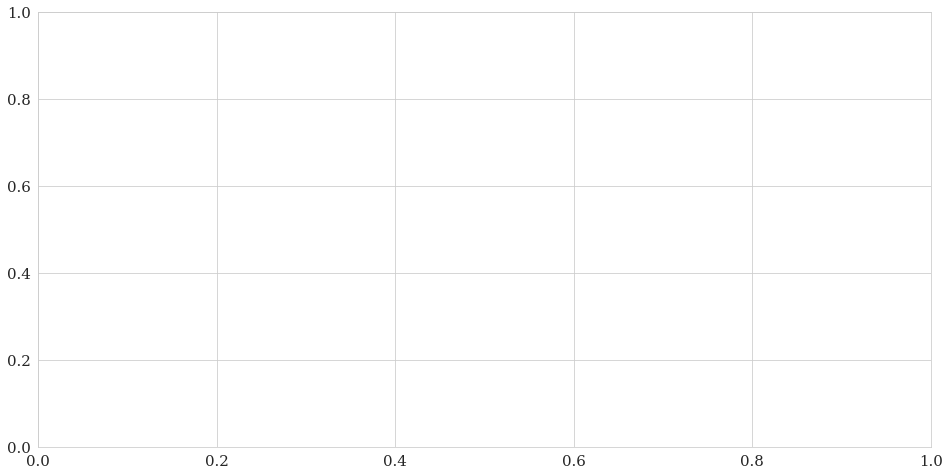

In [74]:
make_time_plot(split="test")

ValueError: Could not interpret value `train_time` for `y`. An entry with this name does not appear in `data`.

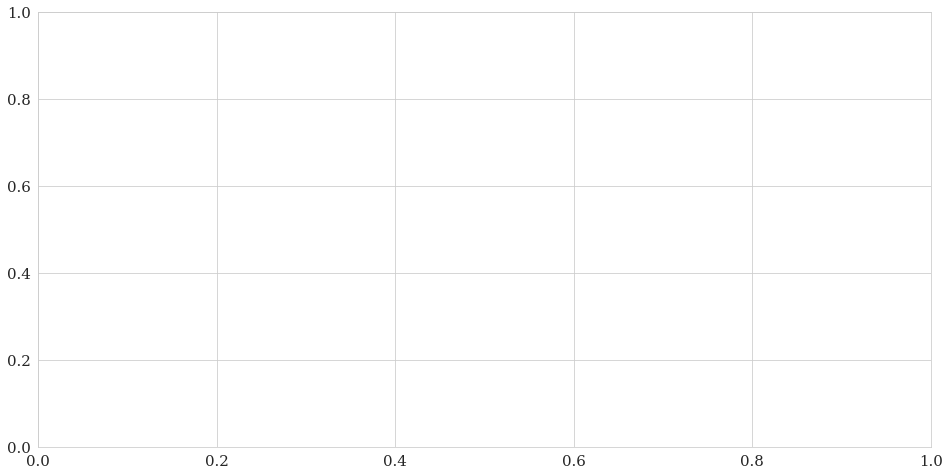

In [75]:
make_time_plot(split="train")

0.5109837631327602 0.47561441020663997


NameError: name 'mlp_1024_mean_rocauc_random' is not defined

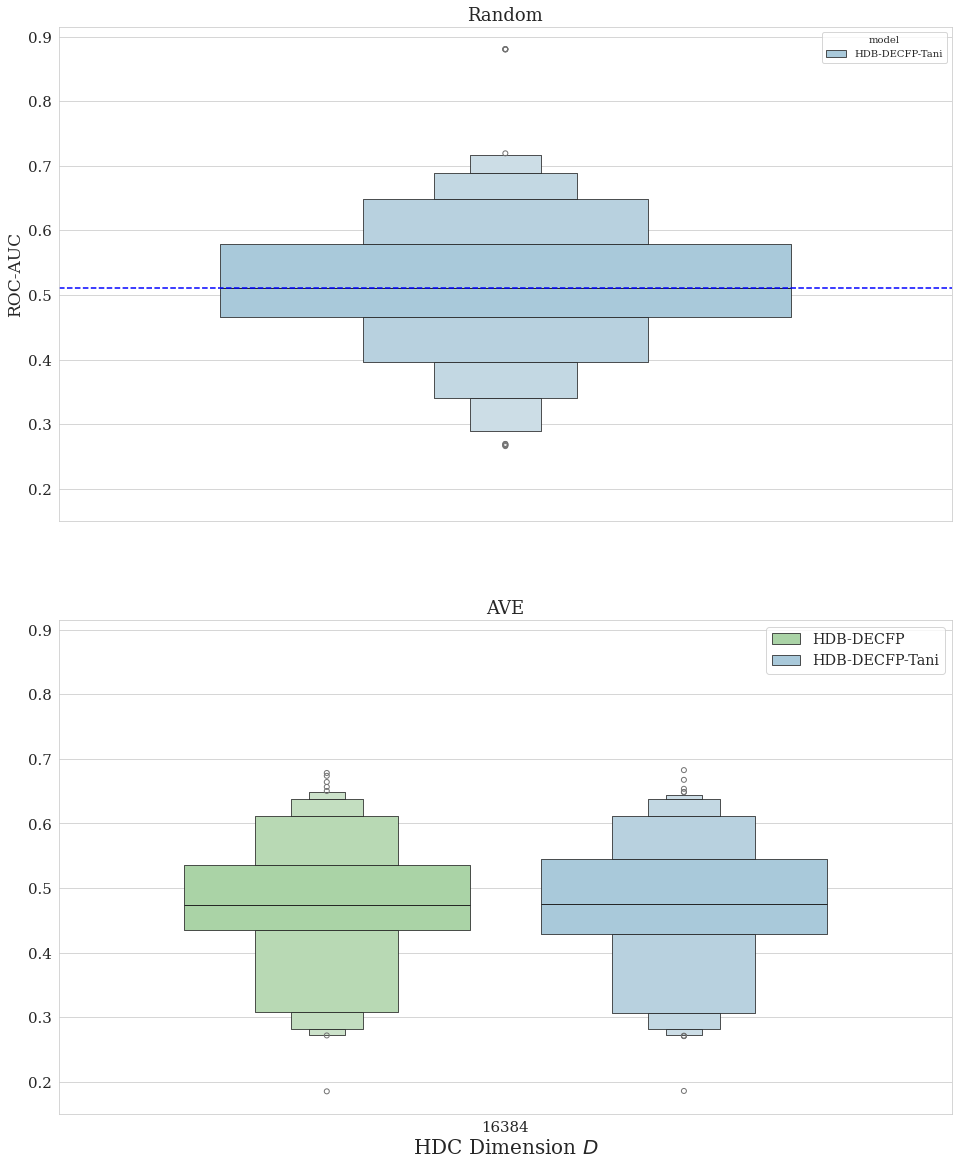

In [76]:
make_roc_auc_plot()

In [ ]:
make_er1_plot()

In [ ]:
ave_metric_df['target'].unique()

In [ ]:
lit_pcba_summary_df = pd.read_csv("/g/g13/jones289/workspace/hd-cuda-master/notebooks/lit-pcba-dataset-overview.csv")
merge_df = pd.merge(ave_metric_df, lit_pcba_summary_df, left_on="target", right_on="Set")


# merge_df
# paper_df = merge_df[merge_df["D"] > 10000].groupby(["model", 'D', 'target']).describe()[['roc-auc', 'er-1']].round(2)
paper_df = merge_df[merge_df["D"] > 10000].groupby(["model", 'D', 'target']).describe().round(2)


mask_cols = [x for x in paper_df.columns if x[1] in ["mean", "std", "min", "max"]]
paper_df = paper_df.loc[:, mask_cols]
mask_cols = [x for x in paper_df.columns if x[0] in ["roc-auc", "er-1", "Actives"]]
paper_df = paper_df.loc[:, mask_cols]
# print(paper_df.columns)
mask_cols = [x for x in paper_df.columns if x[0] != "Actives" or x[0] == "Actives" and x[1] not in ["std", "min", "max"]]
paper_df = paper_df.loc[:, mask_cols]
# paper_df.to_csv("lit-pcba-by-target-metrics.csv")
paper_df.to_latex("lit-pcba-by-target-metrics.tex")
paper_df